# Supervised learning with Pandas and Scikit Learn

## Regression
First, let's get some data.

In [1]:
import pandas as pd

# File is in housing-all.csv
housingDF = pd.read_csv('../data/housing-all.csv')

housingDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,house_value
0,-117.62,33.43,23.0,4052.0,955.0,1950.0,859.0,4.0647,240600.0
1,-118.37,33.81,36.0,2031.0,339.0,817.0,337.0,5.1271,458300.0
2,-117.87,34.07,21.0,4723.0,882.0,2210.0,768.0,3.8167,258700.0
3,-117.37,33.19,33.0,2205.0,453.0,1138.0,439.0,2.8819,208600.0
4,-119.34,36.62,26.0,1922.0,339.0,1148.0,332.0,2.6058,92200.0


Suppose we want to predict `house_value` (that's our target or dependent variable (DV)). Let's start by segmenting our feature columns from the DV.

In [2]:
features = housingDF.drop('house_value', axis=1)
houseValues = housingDF['house_value']

features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.62,33.43,23.0,4052.0,955.0,1950.0,859.0,4.0647
1,-118.37,33.81,36.0,2031.0,339.0,817.0,337.0,5.1271
2,-117.87,34.07,21.0,4723.0,882.0,2210.0,768.0,3.8167
3,-117.37,33.19,33.0,2205.0,453.0,1138.0,439.0,2.8819
4,-119.34,36.62,26.0,1922.0,339.0,1148.0,332.0,2.6058


In [3]:
houseValues.head()

0    240600.0
1    458300.0
2    258700.0
3    208600.0
4     92200.0
Name: house_value, dtype: float64

## Make training, dev, and test splits

We'll make them 60/20/20. We'll use a housing dataset to test with.

In [4]:
from sklearn.model_selection import train_test_split

# First, break into (training+dev, 80%) and (testing, 20%)
trainDevFeatures, testFeatures, trainDevHouseValues, testHouseValues = \
    train_test_split(features, houseValues, train_size=.8)

# Second, break the trainDev set into (training, 75%) and (dev, 25%):
# trainFeatures and devFeatures
# trainHouseValues and devHouseValue
trainFeatures, devFeatures, trainHouseValues, devHouseValues = \
    train_test_split(trainDevFeatures, trainDevHouseValues, train_size=0.75)

print(
    trainFeatures.shape,
    trainHouseValues.shape,
    devFeatures.shape,
    devHouseValues.shape,
    testFeatures.shape,
    testHouseValues.shape
)

### BIG NOTE: 
# If you are working with classification and your targets are labels,
# you should stratify the observations relative to class label across
# splits. You can do this by supplying `train_test_split` with the parameter
# `stratify=ys` -- where where `ys` is the name of your target Series.
# E.g., if `houseValues` was a Series of class labels rather than real values,
# we could stratify it by doing `stratify=houseValues` in our call to `train_test_split`.

(12259, 8) (12259,) (4087, 8) (4087,) (4087, 8) (4087,)


In [5]:
devHouseValues

6796      59800.0
4439     337300.0
18003    500001.0
9685     157800.0
16350    153500.0
           ...   
14957    202700.0
924      112500.0
12354    500001.0
4016     238500.0
15031    234600.0
Name: house_value, Length: 4087, dtype: float64

## Next, we're going to scale the features

Scaling will map all of the values of a particular feature into a given range; we'll do \[0,1\].

We'll do this by creating (fitting) a scaling model with the training data -- that'll find the min and max of "seen" data. Then we will run the dev and test sets through that model. This way we don't use any extremes that occur only in the dev or test sets in our scaling model.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

trainFeaturesScaled = trainFeatures.copy()
devFeaturesScaled = devFeatures.copy()
testFeaturesScaled = testFeatures.copy()

trainFeaturesScaled[trainFeaturesScaled.columns] = scaler.fit_transform(trainFeatures)

# NOTE: we're using the scaler object fit to the training set for these;
# for min-max scaling, that means the max and min of each feature of the training
# set is used, which means some of the values in the dev or test may be outside of
# the range [0,1].
devFeaturesScaled[devFeaturesScaled.columns] = scaler.transform(devFeatures)
testFeaturesScaled[testFeaturesScaled.columns] = scaler.transform(testFeatures)





In [7]:
trainFeaturesScaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13562,0.582996,0.170032,0.352941,0.039877,0.023898,0.012528,0.023680,0.693177
13051,0.452429,0.199787,0.411765,0.072490,0.076195,0.037277,0.080086,0.215894
18930,0.705466,0.120085,0.156863,0.407234,0.423184,0.202696,0.386285,0.198280
15860,0.256073,0.763018,0.803922,0.091218,0.107542,0.052580,0.111495,0.069413
13686,0.217611,0.702444,0.627451,0.032552,0.026847,0.012080,0.024009,0.181039
...,...,...,...,...,...,...,...,...
18194,0.217611,0.523911,0.764706,0.090636,0.060211,0.027523,0.059859,0.648446
12747,0.646761,0.155154,0.627451,0.167356,0.147579,0.098770,0.150140,0.269231
8491,0.186235,0.579171,0.607843,0.126774,0.097921,0.043107,0.102779,0.350285
15917,0.712551,0.056323,0.392157,0.062314,0.082713,0.026486,0.076632,0.192997


## Linear regression

Let's create a model where we use just the total rooms, total bedrooms, and the median income of the area as features, and house value as the dependent variable that we want to predict.

In [8]:
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso

featureNames = ['total_rooms', 'total_bedrooms', 'median_income']
model = LinearRegression()
# TODO -- fit the model.
model.fit(trainFeaturesScaled[featureNames], trainHouseValues)

LinearRegression()

### What do the coefficients tell us? How about the intercept?

In [9]:
print(
    model.coef_,
    model.intercept_
)

print(f'{"intercept":>20}: {model.intercept_:>15.5f}')
for coef,feature in zip(model.coef_, featureNames):
    print(f'{feature:>20}: {coef:>15.5f}')
print()

[-1033299.50950648  1077233.42832477   715751.34922088] 34355.02082784398
           intercept:     34355.02083
         total_rooms:  -1033299.50951
      total_bedrooms:   1077233.42832
       median_income:    715751.34922



In [10]:
# Make predictions on the development set.
devPredicted = model.predict(devFeaturesScaled[featureNames])

In [11]:
devPredicted

array([101023.11966785, 302662.93613836, 318606.05297501, ...,
       481797.76292061, 187751.05257038, 229226.12053124], shape=(4087,))

In [12]:
devHouseValues

6796      59800.0
4439     337300.0
18003    500001.0
9685     157800.0
16350    153500.0
           ...   
14957    202700.0
924      112500.0
12354    500001.0
4016     238500.0
15031    234600.0
Name: house_value, Length: 4087, dtype: float64

### Let's evaluate

What do these mean?

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math


print(f'MSE: {mean_squared_error(devHouseValues, devPredicted)}')
print(f'\tRMSE: {math.sqrt(mean_squared_error(devHouseValues, devPredicted))}')
print(f'r2: {r2_score(devHouseValues, devPredicted)}')
print(f'MAE: {mean_absolute_error(devHouseValues, devPredicted)}')


MSE: 6557614275.186522
	RMSE: 80979.09776718015
r2: 0.5146009500372175
MAE: 59775.11474457371


## Slightly different model

Let's try making a model that uses *all* the features that aren't the DV (house value). -- Use the same training and development sets!

In [14]:
# Choose the features.
# "Fit" or "learn" the model
#featureNames = ['total_rooms', 'total_bedrooms', 'median_income']
featureNames = trainFeaturesScaled.columns
model = LinearRegression()
model.fit(trainFeaturesScaled[featureNames], trainHouseValues)

# Describe the model.
print(f'price = {model.intercept_} ', end="")
for coef,feature in zip(model.coef_, featureNames):
    print(f'+ {coef}*{feature} ', end="")
print()

# Make predictions with the model.
devPredicted = model.predict(devFeaturesScaled[featureNames])

# Evaluate the predictions.
print(f'MSE: {mean_squared_error(devHouseValues, devPredicted)}')
print(f'\tRMSE: {math.sqrt(mean_squared_error(devHouseValues, devPredicted))}')
print(f'r2: {r2_score(devHouseValues, devPredicted)}')
print(f'MAE: {mean_absolute_error(devHouseValues, devPredicted)}')

price = 366752.00491256744 + -425943.9284570983*longitude + -401285.9228415471*latitude + 59192.96345248074*housing_median_age + -300947.29804024455*total_rooms + 826845.3914293207*total_bedrooms + -1229966.2758847738*population + 162603.07715060015*households + 589409.5604728265*median_income 
MSE: 4874762352.318376
	RMSE: 69819.49836770797
r2: 0.6391667891228057
MAE: 51002.17468311095


## Other regression algorithms

You can do the same but using many other regression algorithms. [Here's a whole page of regression algorithms avaialble from Scikit Learn](https://scikit-learn.org/stable/supervised_learning.html).

--------

# Classification

This is essentially the same thing as linear regression in terms of set up, etc. However, we'll be performing *binary classification*—we're trying to predict "yes"/"no" or "class 1"/"class 2". The scikit-learn classfication models want the Y values to be 0/1, so we need to map our class labels to 0/1.

We can create a binary classification problem out of just about anything. For the housing dataset we processed above, let's look at the spread of house values in the training set and see if we can establish a "really expensive" vs. "not really expensive" class.

In [15]:
trainHouseValues.describe()

count     12259.000000
mean     207297.266009
std      115470.793635
min       14999.000000
25%      119950.000000
50%      179800.000000
75%      266000.000000
max      500001.000000
Name: house_value, dtype: float64

<Axes: ylabel='Frequency'>

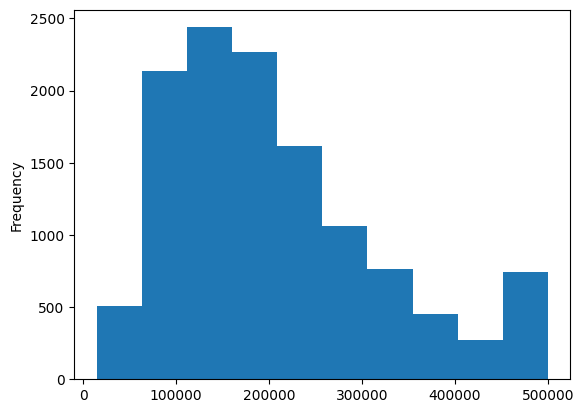

In [16]:
trainHouseValues.plot.hist()

Looking at this, let's say anything that's at or over the 75th percentile (~\$265,000) is "really expensive".

Now we need to binaryize the housing values.  We can do this by *mapping* the current housing values (in dollars) to 0 or 1 using the `Series.map()` function:

In [17]:
expensiveThreshold = trainHouseValues.quantile(0.75)

def houseValueToBinary(value):
    if value <= expensiveThreshold:
        return 0
    return 1

# TODO complete this
trainHouseValueClass = trainHouseValues.map(houseValueToBinary)
trainHouseValueClass.head()

13562    1
13051    1
18930    0
15860    0
13686    0
Name: house_value, dtype: int64

In [18]:
trainHouseValues.head()

13562    483100.0
13051    312200.0
18930    131800.0
15860     66300.0
13686    108000.0
Name: house_value, dtype: float64

Now we do that for our development and test sets as well.

In [19]:
devHouseValueClass = devHouseValues.map(houseValueToBinary)
testHouseValueClass = testHouseValues.map(houseValueToBinary)

## k-Nearest Neighbors

The next step is to train the model. This part looks a lot like linear regression; the only difference will be the name of the class and we'll use the binarized house values. Let's train a kNN model onall the features.

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Due to a warning that KNeighborsClassifier will output when you use DataFrames,
# we're converting our feature DataFrames to numpy arrays:
modelKnn = KNeighborsClassifier(5) # use k=5
modelKnn.fit(trainFeaturesScaled.values, trainHouseValueClass)
devPredictedClass = modelKnn.predict(devFeaturesScaled.values)
devPredictedProbs = modelKnn.predict_proba(devFeaturesScaled.values)


print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

NameError: name 'accuracy_score' is not defined

## Logistic regression

Now let's try  logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

modelBinary = LogisticRegression()
modelBinary.fit(trainFeaturesScaled, trainHouseValueClass)

In [ ]:
trainFeaturesScaled

In [ ]:
# What are these?

print(
    modelBinary.coef_,
    modelBinary.intercept_
)

print(f'{"intercept":>20}: {modelBinary.intercept_[0]:>15.5f}')
for coef,feature in zip(modelBinary.coef_[0], featureNames):
    print(f'{feature:>20}: {coef:>15.5f}')
print()

In [ ]:
# Make predictions on the development set.

# Predict the class (0 or 1).
devPredictedClass = modelBinary.predict(devFeaturesScaled)

# Returns the raw probability of the 0 and 1 class. This is needed for some measures, like AUC.
devPredictedProbs = modelBinary.predict_proba(devFeaturesScaled)
devPredictedProbs

In [ ]:
devPredictedProbs[:,1]
devPredictedProbs[2,:] # all columns, but just row index 3
devPredictedProbs[2][:]


Evaluation is also similar, but different metrics. Area under the receiver operator characteristic curve (`roc_auc_score`) requires the predictions—what is the `[:,1]` bit about?

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

**Is our model any good?**

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(trainFeaturesScaled.values, trainHouseValueClass)
devPredictedClass = modelDT.predict(devFeaturesScaled.values)
devPredictedProbs = modelDT.predict_proba(devFeaturesScaled.values)


print(f'Accuracy: {accuracy_score(devHouseValueClass, devPredictedClass)}')
print(f'Precision: {precision_score(devHouseValueClass, devPredictedClass)}')
print(f'Recall: {recall_score(devHouseValueClass, devPredictedClass)}')
print(f'F1: {f1_score(devHouseValueClass, devPredictedClass)}')
print(f'AUC: {roc_auc_score(devHouseValueClass, devPredictedProbs[:,1])}')

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TODO

# Balancing datasets

In classifictation, balanced datasets provide an equal number of observations corresponding to each class. If you have a dataset where there is an imbalance, there are several ways you can rectify it. A couple of simple approaches are:

  * oversample observations of the class that is underrepresented
  * undersample observations of the class that is overrepresented
  * create synthetic observations of the class that is underrepresented
  * some combination of these
  
The first is pretty simple and doesn't throw away data. It works as follows. Assume the underrepresented class is A and the overrepresented class is B. Let $n$ be the number of observations of class A and $m$ be the number of observations of class B. $m-n$ times we will randomly choose one of the $n$ observations of class A and add them to a separat set. The same observation can be picked multiple times (this is called random sampling with replacement). We now combine the $n$ original observations of class A, the $m-n$ duplicated observations, and the $m$ observations of class B to get our new balanced dataset.

There are libraries that can do this for you, but it's easy enough to write:

In [ ]:
import pandas as pd

housingDF = pd.read_csv('../data/housing-all.csv')
housingDF['is_really_expensive'] = housingDF['house_value'].map(lambda x: 1 if x >= expensiveThreshold else 0)
housingDF['is_really_expensive'].plot.hist()

In [ ]:
# We can see that the 1.0 class is the underrepresented class, so we'll oversample that.

diff = len(housingDF[housingDF['is_really_expensive'] == 0]) - len(housingDF[housingDF['is_really_expensive'] == 1]) 
newSample = housingDF[housingDF['is_really_expensive'] == 1].sample(n=diff, replace=True)
newSample.describe()

In [ ]:
housingDFBalanced = pd.concat([housingDF, newSample])
housingDFBalanced['is_really_expensive'].plot.hist()

Once you've made a balanced dataset, you can go ahead and make your training and development splits.

# Next steps

There are LOTS of other classification and regression models out there—check out [the Scikit Learn website](https://scikit-learn.org/stable/index.html) for more. They follow pretty similar patterns. Each algorithm also has several parameters you can adjust, so be sure to read the documentation pages and guides to find out how to tweak them.

Scikit Learn also has a construct called *pipelines*, which I haven't gone over in this notebook. You can find out more about those [here](https://scikit-learn.org/stable/modules/compose.html#combining-estimators).
